##<font color="orange">__*Decision Tree -Regression*__</font>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split

In [21]:
X=np.array([[500],[700],[1000],[1250],[1750],[2000]])
y=np.array([150,200,250,300,350,400])

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [23]:
regressor=DecisionTreeRegressor(max_depth=3)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

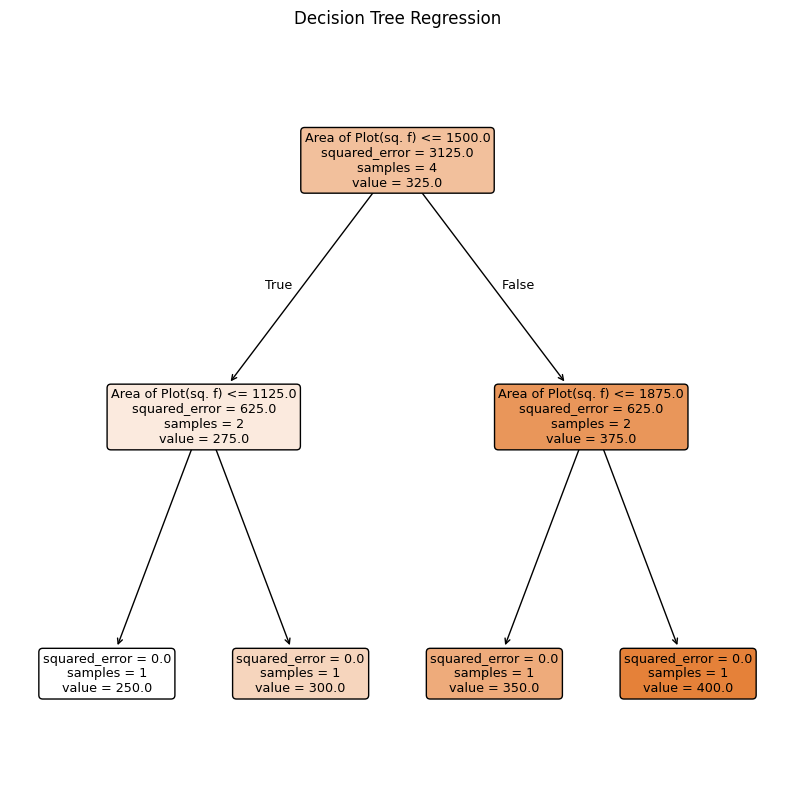

In [24]:
plt.figure(figsize=(10,10))
plot_tree(regressor, feature_names=['Area of Plot(sq. f)'],filled=True, rounded=True)
plt.title("Decision Tree Regression")
plt.show()

##<font color="orange">__*Decision Tree -Classification*__</font>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [26]:
from sklearn.datasets import load_iris
data=load_iris()
X= data.data
y=data.target

In [27]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y, test_size=0.3, random_state=99)

In [28]:
clf=DecisionTreeClassifier(random_state=1)
clf.fit(X_train_cls,y_train_cls)

DecisionTreeClassifier(random_state=1)

In [29]:
from  sklearn.metrics import accuracy_score

y_pred= clf.predict(X_test_cls)
accuracy=accuracy_score(y_test_cls,y_pred)
print(f"Accuracy of Model:{accuracy}")

Accuracy of Model:0.9555555555555556


# Accuracy after Apply Hyperparameter Tuing

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier

param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 20, 2),
    'min_samples_split': range(2, 20, 2),
    'criterion': ["entropy", "gini"]
}

tree = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator=tree, param_grid=param_grid,
                           cv=5, verbose=True)
grid_search.fit(X_train_cls, y_train_cls) # Corrected variable names

print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
best accuracy 0.9714285714285715
DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       random_state=1)


Accuracy: 0.9555555555555556
Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
best accuracy 0.9714285714285715
DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       random_state=1)


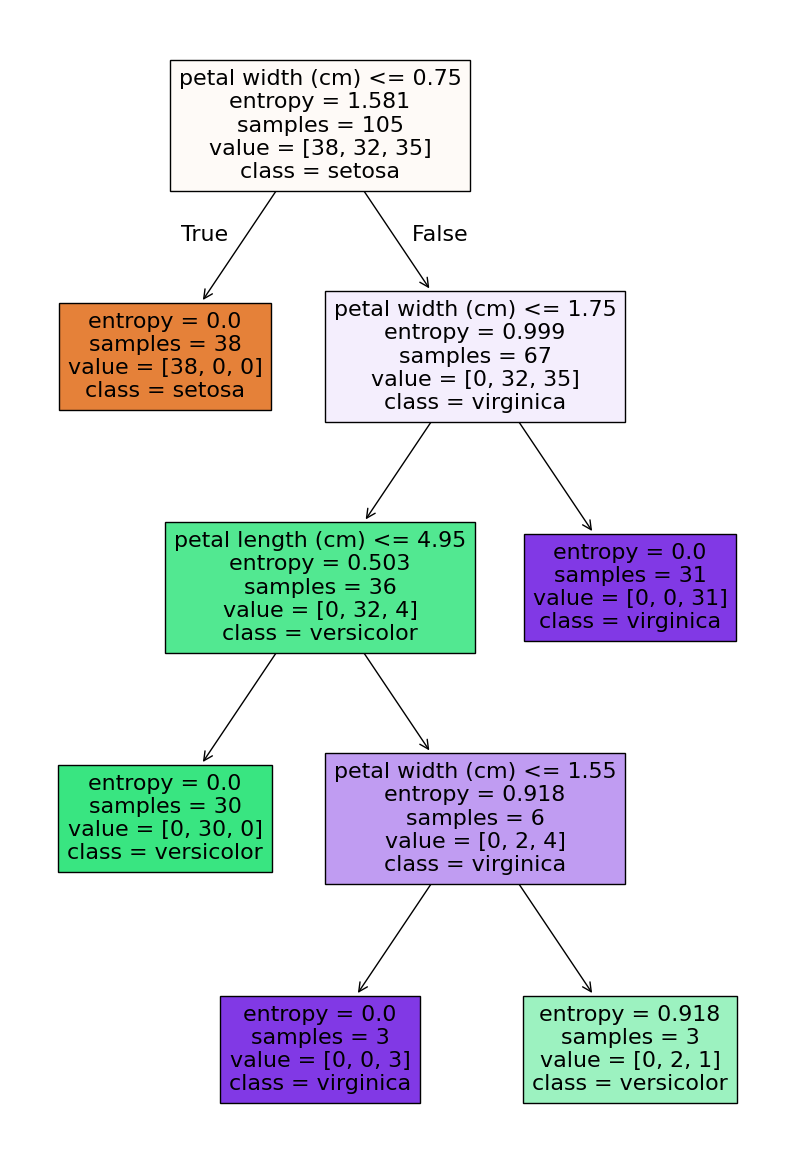

In [33]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state = 99)

clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



### after hyprt
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 20, 2),
    'min_samples_split': range(2, 20, 2),
    'criterion': ["entropy", "gini"]
}

tree = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator=tree, param_grid=param_grid,
                           cv=5, verbose=True)
grid_search.fit(X_train, y_train)

print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_clf = grid_search.best_estimator_

plt.figure(figsize=(10, 15))
plot_tree(tree_clf, filled=True, feature_names=data.feature_names,
          class_names=data.target_names)
plt.show()

# Support vector machine

In [45]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.svm import SVC

import numpy as np
import pandas as pd

In [42]:
#loading dataset

cancer=load_breast_cancer()
X=cancer.data[:,:2]
y=cancer.target

In [48]:
#build the model

svm=SVC(kernel='rbf',gamma=0.5, C=1.0)
svm.fit(X,y)

SVC(gamma=0.5)

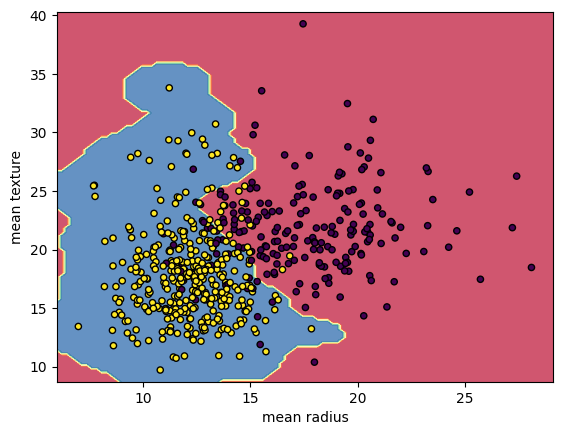

In [50]:
#Plot decision boundrycoolwarm
from sklearn.inspection import DecisionBoundaryDisplay
DecisionBoundaryDisplay.from_estimator(svm,X,response_method='predict',cmap=plt.cm.Spectral,
alpha=0.8,
xlabel=cancer.feature_names[0],
ylabel=cancer.feature_names[1],

)
#scatter plot
plt.scatter(X[:,0], X[:,1],
            c=y,
            s=20, edgecolors='k')
plt.show()

In [51]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

cancer = load_breast_cancer()

df_feat = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df_target = pd.DataFrame(cancer['target'], columns=['Cancer'])

print("Feature Variables: ")
print(df_feat.info())
print("Dataframe looks like : ")
print(df_feat.head())


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
						df_feat, np.ravel(df_target),
				test_size = 0.30, random_state = 101)


#Step 4: Training an SVM Model without Hyperparameter Tuning
model = SVC()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))


#Step 5: Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(X_train, y_train)

Feature Variables: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smooth

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)